In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/vehicle_dataset/vehicles.csv'

df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.shape

(426880, 26)

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
remove_features = ['id','url','region','region_url','image_url','description','posting_date','county','VIN']
df = df.drop(remove_features, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [ ]:
# dealing with missing values
df.isnull().sum()

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
lat               6549
long              6549
dtype: int64

In [ ]:
# prompt: write a code to drop the rows whose price column is 0 or NaN
df = df[df['price'] != 0].dropna(subset=['price'])

In [ ]:
df.isnull().sum()

price                0
year              1173
manufacturer     16185
model             4701
condition       151389
cylinders       160410
fuel              2594
odometer          2290
title_status      7734
transmission      1823
drive           120254
size            282933
type             85932
paint_color     117149
state                0
lat               3489
long              3489
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393985 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         393985 non-null  int64  
 1   year          392812 non-null  float64
 2   manufacturer  377800 non-null  object 
 3   model         389284 non-null  object 
 4   condition     242596 non-null  object 
 5   cylinders     233575 non-null  object 
 6   fuel          391391 non-null  object 
 7   odometer      391695 non-null  float64
 8   title_status  386251 non-null  object 
 9   transmission  392162 non-null  object 
 10  drive         273731 non-null  object 
 11  size          111052 non-null  object 
 12  type          308053 non-null  object 
 13  paint_color   276836 non-null  object 
 14  state         393985 non-null  object 
 15  lat           390496 non-null  float64
 16  long          390496 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [ ]:
df.head(50)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN


In [ ]:
# prompt: code to remove first 28 rows

df = df.iloc[22:]


In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,32.590,-85.4800
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,32.590,-85.4800
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592,-85.5189


In [ ]:
# prompt: make a list of columns that has object type

object_cols = [col for col in df.columns if df[col].dtype == 'object']
print(object_cols)


['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [ ]:
# prompt: write code to find the uniue values of all the features in the given dataset

for column in object_cols:
  unique_values = df[column].unique()
  print(f"Unique values for column '{column}':")
  for value in unique_values:
    print(f"\t- {value}")


Streaming output truncated to the last 5000 lines.
	- rat rod
	- f450 diesel powerstroke
	- boyertown
	- Samurai JLX
	- 100 cs quattro wagon
	- 5 window
	- sportsman trans van
	- silverado 3500hd ltz 4
	- 100 pick-up truck
	- HUDSON Convertible
	- olds coupe
	- fiesta se 4dr sedan
	- mustang gt premium 2dr conv
	- civic ex, gas saver, reli
	- cargo van nv2500
	- sierra 3500hd srw denali
	- super duty f-250 srw king
	- winstar
	- grand marquis limited
	- focus 5dr hb se
	- escort xz2
	- sierra 1500 sle 4x4 4dr exte
	- International DT4400
	- f-350 super duty crwc
	- 5500 crew cab flatbed
	- Peterbilt Hino International
	- civic hybrid 4dr sedan
	- sierra 3500hd sle 4x4 4dr do
	- and freightliner
	- c-max energi hatchback se
	- 2010 Freightliner Cascadia
	- PONTAIC
	- custom f150 4x4
	- crv se awd
	- astro.
	- International KB-2
	- Damon Workhorse
	- 1983 Trans Am
	- couger
	- t campervn
	- silverado 1500 crew c
	- bus camper
	- 89’ geo tracker
	- 1989 cummins truck
	- 300d turbodiesel
	

Analysis on state

In [ ]:
# code to count the total unique values in state column

unique_state_count = df['state'].nunique()
print(f"Total unique values in 'state' column: {unique_state_count}")


Total unique values in 'state' column: 51


In [ ]:
# prompt: count the frequency of unique items in state column

state_counts = df['state'].value_counts()
print(state_counts)


ca    45359
fl    27315
tx    21377
ny    17904
oh    16649
mi    16433
or    14259
pa    12902
nc    12697
wa    12462
wi    11166
tn    10510
co    10407
il     9895
nj     9338
va     8754
id     8249
az     8228
ia     8117
ma     7992
mn     7346
ga     6294
mt     6039
ks     5946
sc     5653
ok     5610
in     5502
ct     5049
al     4715
md     4348
ky     4060
mo     3944
nm     3861
ak     3437
ar     3260
nv     3061
nh     2944
me     2761
la     2760
hi     2735
dc     2663
vt     2460
ri     2281
sd     1238
ut     1126
ne     1021
wv     1003
ms      974
de      896
wy      573
nd      390
Name: state, dtype: int64


:the state data is very imbalance. the state like california has 45k+ records while state like north dakota and wyoming has less than 1k records.

In [ ]:
# prompt: separate all the records that has word 'civic' in model column. keep in mind there is nan value in this column

df_civic = df[df['model'].str.contains('civic', case=False, na=False)]

# Display the first few rows of the filtered DataFrame
df_civic


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
74,26590,2020.0,honda,civic si coupe 2d,good,NaN,gas,9954.0,clean,other,fwd,NaN,coupe,silver,al,32.590000,-85.480000
75,18590,2018.0,honda,civic lx sedan 4d,good,NaN,gas,28942.0,clean,other,fwd,NaN,sedan,white,al,32.590000,-85.480000
77,21590,2018.0,honda,civic ex sedan 4d,good,NaN,gas,7885.0,clean,other,fwd,NaN,sedan,NaN,al,32.590000,-85.480000
530,3500,1995.0,honda,civic del sol si,good,4 cylinders,gas,215000.0,clean,manual,fwd,compact,convertible,red,al,33.353800,-86.825400
589,3950,2003.0,honda,civic ex,excellent,4 cylinders,gas,236890.0,clean,automatic,NaN,NaN,NaN,NaN,al,33.415861,-86.988407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426428,18590,2016.0,honda,civic lx sedan 4d,good,NaN,gas,8927.0,clean,other,fwd,NaN,sedan,white,wy,33.786500,-84.445400
426537,11280,2015.0,honda,civic,good,NaN,gas,48710.0,clean,automatic,NaN,NaN,NaN,white,wy,41.424700,-105.478100
426737,2500,2005.0,honda,civic,good,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy,41.326706,-105.586510
426848,4277,2005.0,honda,civic,NaN,NaN,gas,236787.0,clean,automatic,NaN,NaN,coupe,NaN,wy,45.762900,-108.539000


In [ ]:
# prompt: Using dataframe df_civic: find the unique value in model columns and its frequency

print(df_civic['model'].value_counts())


civic                     2597
civic lx                   477
civic ex                   327
civic si coupe 2d          182
civic sedan                130
                          ... 
civic sport hatch back       1
civic sport sensing          1
civic ex turbo               1
civic cvcc                   1
civic ex-l 1.8l              1
Name: model, Length: 234, dtype: int64


from above code it is clear that we have maximum honda civic car named only with civic that is 2.5k+ while other models of civic are named very few times. So we will go with a general name that represent all sub-models of honda civic that is 'civic'.

In [ ]:
# prompt: replace all the records that has word 'civic' with 'civic' in model column in df dataframe

df['model'] = df['model'].apply(lambda x: 'odyssey' if isinstance(x, str) and 'oddysey' in x else x)


In [ ]:
df[df['model'].str.contains('crv', case=False, na=False)]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
178,12950,2011.0,honda,crv ex,excellent,4 cylinders,gas,87994.0,clean,automatic,fwd,NaN,SUV,silver,al,33.384664,-86.737847
487,11990,2011.0,honda,crv ex-l,excellent,4 cylinders,gas,109000.0,clean,automatic,fwd,NaN,SUV,NaN,al,33.506600,-86.742800
1167,12950,2011.0,honda,crv ex,excellent,4 cylinders,gas,87994.0,clean,automatic,fwd,NaN,SUV,silver,al,33.384664,-86.737847
1613,3200,1997.0,honda,crv ex awd,good,4 cylinders,gas,155000.0,clean,automatic,4wd,mid-size,SUV,black,al,33.953400,-86.745500
1834,27345,2019.0,honda,crv touring suv,NaN,NaN,gas,23005.0,clean,automatic,NaN,NaN,NaN,NaN,al,29.803013,-82.529850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423162,7990,2008.0,honda,crv,excellent,6 cylinders,gas,131145.0,clean,automatic,4wd,mid-size,SUV,black,wi,43.043930,-88.261909
423402,24995,2018.0,honda,crv ex-l,excellent,4 cylinders,gas,86278.0,clean,automatic,4wd,NaN,SUV,white,wi,43.062200,-88.098000
423772,7995,2012.0,honda,crv,NaN,NaN,gas,165101.0,clean,automatic,4wd,NaN,NaN,NaN,wi,42.999300,-88.219600
424761,7990,2008.0,honda,crv,excellent,6 cylinders,gas,131145.0,clean,automatic,4wd,mid-size,SUV,black,wi,43.043930,-88.261909


In [ ]:
df['model'] = df['model'].apply(lambda x: 'hrv' if isinstance(x, str) and 'hrv ' in x else x)

In [ ]:
# prompt: find all the unique value of model column given manufacturer column=honda

honda_models = df[df['manufacturer'] == 'honda']['model'].unique()
print(honda_models)


['odyssey' 'civic si coupe 2d' 'civic lx sedan 4d' 'civic ex sedan 4d' nan
 'crv ex' 'ridgeline' 'accord' 'accord ex-l' 'odyssey ex'
 'pilot lx sport utility 4d' 'accord sedan' 'crv ex-l' 'cr-v ex-l'
 'civic del sol si' 'accord crosstour exl' 'civic ex' 'element ex'
 'accord coupe' 'crosstour ex-l' 'civic type r' 'odyssey exl' 'cr-v lx'
 'cr-v' 'acty' 'civic' 'civic exl' 'pilot' 'crv ex awd' 'crv touring suv'
 'accord sport' 'accord sedan lx' 'accord touring 2.0t' 'cr-v ex'
 'pilot ex' 'accord ex' 'odyssey touring elite' 'accord se' 'cbr650'
 'civic lx' 'passport elite' 'accord lx' 'pilot ex-l'
 'accord sport se sedan 4d' 'crx' 'civic sedan' 'odyssey ex-l'
 'accord lx-p' 'hrv' 'accord ex-l coupe 2d' 'accord ex-l sedan 4d' 'hr-v'
 'crv' 'element' 'civic lx coupe 2d' 'civic sport touring'
 'fit ex automatic' 'accord sedan touring automatic' 'crx si'
 'civic si sedan' 'civic hybrid pzev sedan' 'hr-v lx awd' 'fit'
 'civic hybrid sedan' 'hr-v sport awd' 'crv exl 4wd' 'accord coupe ex-l'
 'f

In [ ]:
# prompt: find all the unique value of model column given manufacturer column=honda and its frequency. for all the items with frequency less than 500. drop the record from 'df' dataframe
honda_models_with_counts = df[df['manufacturer'] == 'honda']['model'].value_counts()
models_to_drop = honda_models_with_counts[honda_models_with_counts < 500].index.tolist()
df = df[~df['model'].isin(models_to_drop)]


In [ ]:
# prompt: find all the unique value of model column given manufacturer column=honda

honda_models = df[df['manufacturer'] == 'honda']['model'].unique()
print(honda_models)


[nan]


for chevrolet

In [ ]:
# prompt: find all the unique value of model column given manufacturer column=chevrolet from df fataframe

chevrolet_models_with_counts = df[df['manufacturer'] == 'chevrolet']['model'].value_counts()
print(chevrolet_models_with_counts)


silverado 1500                                       4546
silverado                                            2778
equinox                                              1769
corvette                                             1607
malibu                                               1577
                                                     ... 
s10 extcab                                              1
silverado 2500hd work truck crew cab long box 4wd       1
silverado z71/ltz                                       1
prizm base                                              1
1500 z71                                                1
Name: model, Length: 2478, dtype: int64


In [ ]:
df['model'] = df['model'].apply(lambda x: 'colorado' if isinstance(x, str) and 'colorado ' in x else x)

In [ ]:
# prompt: find all the unique value of model column given manufacturer column=chevrolet and also print the frequency

chevrolet_models = df[df['manufacturer'] == 'chevrolet']['model'].unique()
chevrolet_models_with_counts = df[df['manufacturer'] == 'chevrolet']['model'].value_counts()
print("Unique models of Chevrolet and their frequency:")
for model, count in chevrolet_models_with_counts.items():
    print(f"\t- {model}: {count}")

Unique models of Chevrolet and their frequency:
	- silverado 1500: 4546
	- silverado: 2778
	- colorado: 1889
	- equinox: 1769
	- corvette: 1607
	- malibu: 1577
	- tahoe: 1521
	- impala: 1516
	- silverado 2500hd: 1403
	- cruze: 1376
	- camaro: 1026
	- suburban: 942
	- traverse: 880
	- silverado 1500 regular: 614
	- camaro ss coupe 2d: 508
	- silverado 1500 crew: 508
	- silverado 1500 double: 496
	- equinox lt: 491
	- corvette grand sport: 478
	- trailblazer: 449
	- avalanche: 427
	- silverado 3500hd: 411
	- silverado 1500 lt: 401
	- impala lt: 324
	- malibu lt: 316
	- cruze lt: 306
	- express cargo van: 297
	- sonic: 295
	- spark: 294
	- silverado 1500 ld: 282
	- express: 273
	- cobalt: 268
	- trax: 238
	- tahoe lt: 238
	- silverado 2500 hd crew: 230
	- tahoe lt sport utility: 217
	- trax lt sport utility: 214
	- hhr: 213
	- silverado 2500: 209
	- silverado 1500 lt 4x4: 192
	- corvette stingray: 186
	- camaro lt coupe 2d: 185
	- 2500: 184
	- c10: 180
	- express commercial cutaway: 176
	

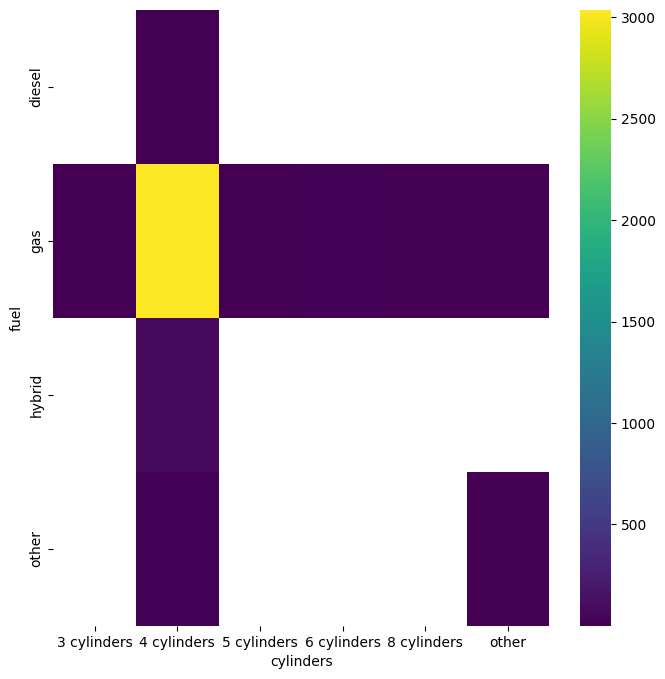

In [ ]:
# @title cylinders vs fuel

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['fuel'].value_counts()
    for x_label, grp in df_civic.groupby('cylinders')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cylinders')
_ = plt.ylabel('fuel')

In [ ]:
### for Ford

In [ ]:
# prompt: find all the unique value of model column given manufacturer column=ford
ford_models= df[df['manufacturer'] == 'ford']['model'].nunique()
print(ford_models)

3662


In [ ]:
# prompt: find all the unique value of model column given manufacturer column=ford
ford_models= df[df['manufacturer'] == 'ford']['model']
print(ford_models)

31                          f-150 xlt
44         ranger supercrew xl pickup
47        f150 super cab xl pickup 4d
50             f150 supercrew cab xlt
53          ranger supercab xl pickup
                     ...             
426791    f-350 super duty 4x2 2dr re
426792                      f350, xlt
426813                       explorer
426817       edge se sport utility 4d
426844                           flex
Name: model, Length: 64787, dtype: object


In [ ]:
ford_models_with_counts = df[df['manufacturer'] == 'ford']['model'].value_counts()
print(ford_models_with_counts)

f-150                      7116
escape                     2516
explorer                   2252
mustang                    2014
fusion                     1670
                           ... 
f550 box truck delivery       1
350 transit high roof         1
explorer sport track          1
f 150 4x4                     1
f150, platinum                1
Name: model, Length: 3662, dtype: int64


In [ ]:
ford_models = df[df['manufacturer'] == 'ford']['model'].unique()
ford_models_with_counts = df[df['manufacturer'] == 'ford']['model'].value_counts()
print("Unique models of ford and their frequency:")
for model, count in ford_models_with_counts.items():
    print(f"\t- {model}: {count}")

Unique models of ford and their frequency:
	- f-150: 7116
	- escape: 2516
	- explorer: 2252
	- mustang: 2014
	- fusion: 1670
	- focus: 1665
	- f-250: 1318
	- edge: 1252
	- f150: 1052
	- expedition: 959
	- f-350: 908
	- f250: 778
	- taurus: 750
	- ranger: 748
	- fusion se: 635
	- f250 super duty: 551
	- focus se: 529
	- super duty f-350 srw: 523
	- f-250 super duty: 520
	- f350: 509
	- mustang gt coupe 2d: 477
	- super duty f-250 srw: 469
	- f-150 xlt: 435
	- flex: 433
	- fiesta: 423
	- super duty f-550 drw: 420
	- f350 super duty: 419
	- super duty f-250: 396
	- ranger supercab xl pickup: 372
	- transit: 362
	- f150 supercrew cab xlt: 344
	- transit connect: 324
	- explorer xlt: 321
	- ranger supercrew xl pickup: 319
	- expedition xlt sport: 313
	- f-350 super duty: 302
	- f150 super cab xl pickup 4d: 289
	- escape xlt: 283
	- f150 supercrew cab: 266
	- super duty f-350 drw: 266
	- f150 regular cab xl pickup: 256
	- escape se: 255
	- f150 super cab xlt pickup: 253
	- c-max hybrid se wa

In [ ]:
# check this code
df['model'] = df['model'].str.replace('-', '').str.replace(' ', '')

In [ ]:
generalized_model=['escape', 'explorer','excursion','expedition','c-max','mustang','econoline','edge','econoline','ranger','crown','fiesta',
                   'fusion', 'bronco','taurus','ecosport', 'mustang','transit','expedition','thunderbird', 'edge','focus','flex','f-150','f150',
                   'f250','f550','f350','f100','f450','f300','f650','f750','f450','f800','f600','eseries','e350','e150','e450','e250',
                   'e35o','esuperduty','e150','e350','e250','e100','e450','e450','cab','pickup','police','superduety','limites','falcon']

for search_str in generalized_model:
    df['model']=df[df['manufacturer'] == 'ford']['model'].apply(lambda x: search_str if isinstance(x, str) and search_str in x else x)


In [ ]:
# droping all the model having count less than 500
ford_models_with_counts = df[df['manufacturer'] == 'ford']['model'].value_counts()
models_to_drop = ford_models_with_counts[ford_models_with_counts < 500].index.tolist()
df = df[~df['model'].isin(models_to_drop)]
# now there are 19 models for the ford company

In [ ]:
# For toyota

In [ ]:
# prompt: find all the unique value of model column given manufacturer column=ford
toyota_models= df[df['manufacturer']=='toyota']['model'].nunique()
print(toyota_models)

0


In [ ]:
ford_models = df[df['manufacturer'] == 'toyota']['model'].unique()
ford_models_with_counts = df[df['manufacturer'] == 'toyota']['model'].value_counts()
print("Unique models of toyota and their frequency:")
for model, count in ford_models_with_counts.items():
    print(f"\t- {model}: {count}")

Unique models of toyota and their frequency:


In [ ]:
generalized_model=['truck','cruie','pickup','venza','camry','tacoma','prius','tundra','sienna','fj','sequoia','yaris','matrix','highlander','avalon','sequoia',
                   'rav4','solara','cruiser','echo','prius','liteace','mr2','supra','celica','4runner','corolla','scion','limited','avolon','pilot']

for search_str in generalized_model:
    df['model']=df[df['manufacturer'] == 'toyota']['model'].apply(lambda x: search_str if isinstance(x, str) and search_str in x else x)


In [ ]:
# droping all the model having count less than 500
toyota_models_with_counts = df[df['manufacturer'] == 'toyota']['model'].value_counts()
models_to_drop = toyota_models_with_counts[toyota_models_with_counts < 500].index.tolist()
df = df[~df['model'].isin(models_to_drop)]
# now there are 19 models for the ford company

In [ ]:
# for nissan
# prompt: find all the unique value of model column given manufacturer column=nissan
nissan_models= df[df['manufacturer']=='nissan']['model'].nunique()
print(nissan_models)

121


In [ ]:
# prompt: find all the unique value of model column given manufacturer column=ford
nissan_models= df['manufacturer'].unique()
print(nissan_models)

['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' nan 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']


In [ ]:
nissan_models = df[df['manufacturer'] == 'nissan']['model'].unique()
nissan_models_with_counts = df[df['manufacturer'] == 'nissan']['model'].value_counts()
print("Unique models of nissan and their frequency:")
for model, count in nissan_models_with_counts.items():
    print(f"\t- {model}: {count}")

Unique models of nissan and their frequency:
	- altima: 3606
	- rogue: 2036
	- sentra: 1835
	- frontier: 1429
	- versa: 1183
	- titan: 1175
	- murano: 1002
	- pathfinder: 1001
	- maxima: 929
	- xterra: 513


In [ ]:
generalized_model=['altima','sentra', 'rogue', 'leaf','frontier','versa','titan','murano','maxima','pathfinder','xterra','370z','nv','armada','quest','juke','kicks','skyline']

for search_str in generalized_model:
    df['model']=df[df['manufacturer'] == 'nissan']['model'].apply(lambda x: search_str if isinstance(x, str) and search_str in x else x)

# convert 'rouge' into 'rogue' as it's count is more
df['model']=df[df['manufacturer'] == 'nissan']['model'].apply(lambda x: 'rogue' if isinstance(x, str) and 'rouge' in x else x)


In [ ]:
# droping all the model having count less than 500
nissan_models_with_counts = df[df['manufacturer'] == 'nissan']['model'].value_counts()
models_to_drop = nissan_models_with_counts[nissan_models_with_counts < 500].index.tolist()
df = df[~df['model'].isin(models_to_drop)]
# now there are 19 models for the ford company

In [ ]:
# for BMW

In [ ]:
bmw_models= df[df['manufacturer']=='bmw']['model'].nunique()
bmw_models
# each and every value of the model are nan

656

In [ ]:
bmw_models = df[df['manufacturer'] == 'bmw']['model'].unique()
bmw_models_with_counts = df[df['manufacturer'] == 'bmw']['model'].value_counts()
print("Unique models of bmw and their frequency:")
for model, count in bmw_models_with_counts.items():
    print(f"\t- {model}: {count}")

Unique models of bmw and their frequency:
	- 3 series: 1986
	- x5: 1638
	- 5 series: 1086
	- x3: 1058
	- 4 series: 755
	- 328i: 553
	- x1: 431
	- 1 series: 326
	- 7 series: 254
	- 528i: 207
	- 2 series: 185
	- 3-series: 183
	- 535i: 168
	- 6 series: 166
	- 335i: 164
	- x6 xdrive35i sport utility: 119
	- 325i: 116
	- 328xi: 113
	- z4 sdrive35is roadster 2d: 97
	- m3: 96
	- 530i: 90
	- x6: 90
	- x4: 83
	- 320i: 83
	- 330i: 75
	- z4: 74
	- 328i xdrive: 65
	- m4: 63
	- 330xi xdrive awd sport sedan: 62
	- m3 convertible 2d: 61
	- x2: 59
	- m5: 56
	- 430i: 50
	- m3 coupe 2d: 48
	- 550i: 46
	- 528xi: 46
	- 325xi: 46
	- m6: 46
	- i3 hatchback 4d: 45
	- 750li: 44
	- 535i xdrive: 41
	- 320i xdrive: 38
	- 525i: 38
	- 750xi xdrive m-sport edition: 38
	- 428i: 37
	- 440xi xdrive gran coupe: 37
	- 650xi xdrive gran coupe: 37
	- 750i: 36
	- 540i: 36
	- z3: 36
	- z4 sdrive28i roadster 2d: 35
	- i3: 34
	- 535xi: 34
	- 650i: 32
	- 325ci: 31
	- 7-series: 31
	- 528i xdrive: 31
	- 740i: 29
	- x6 m: 28
	- 3

In [ ]:
generalized_model=['3 series','4 series','1 series','2 series','5 series','x5','6 series','7 series','x1','x2','x3','x4','x5']

for search_str in generalized_model:
    df['model']=df[df['manufacturer'] == 'bmw']['model'].apply(lambda x: search_str if isinstance(x, str) and search_str in x else x)


df['model']=df[df['manufacturer'] == 'bmw']['model'].apply(lambda x: '5 series' if isinstance(x, str) and '5-series' in x else x)